In [ ]:
"""
 s = mybasel(N)
Calculate finite basel sum 
"""
function mybasel(N)
    s = 0.0
    for n = 1:N
        s += 1/n^2
    end
    return s
end

In [ ]:
round(abs(mybasel(2000) - pi^2/6), sigdigits=1)

In [ ]:

function myrichardson(N)
    s1 = mybasel(N)
    s2 = mybasel(2*N)
    return 2*s2 - s1
    
end

In [ ]:

round(abs(myrichardson(1000) - pi^2/6), sigdigits = 1)

In [ ]:

round(abs(mybasel(5000000) - pi^2/6), sigdigits = 1)

In [ ]:
] add QuadGK # the ] means switching the package

In [ ]:
using QuadGK

In [ ]:
fun1(x) = 1/sqrt(x)

In [ ]:

round(quadgk(fun1, 0, 1)[1], sigdigits=5)

In [ ]:
fun2(x) = exp(-x) * log(x)

In [ ]:
quadgk(fun2, 0, Inf)

# Euler's method for IVP

In [98]:
"""
    t, y = myeulers(fun, a, b, n, y1)

Solve IVP y' = fun(t, y), a <= t <= b, y(a) = y1 using Euler's method.
Use the integration step h = (b - a)/(n - 1). Return a vector of values
of the independent variable t_i, and a vector of correspondinig values
of the solution, y(t_i)
"""
function myeulers(fun, a, b, n, y1)
    t = range(a, b, n)
    y = zeros(n)
    h = t[2] - t[1]
    y[1] = y1
    for i = 1:n-1
        y[i+1] = y[i] + h * fun(t[i], y[i])
    end 
    return t, y
end

myeulers

In [99]:
a = 0.0 
b = 5.0
n = 64
y1 = 0.0
fun(t, y) = exp(-sin(t)) - y * cos(t) # not the same fun as before
yexact(t) = t * exp(-sin(t))

yexact (generic function with 1 method)

In [100]:

t, y = myeulers(fun, a, b, n, y1);

In [101]:

using PyPlot

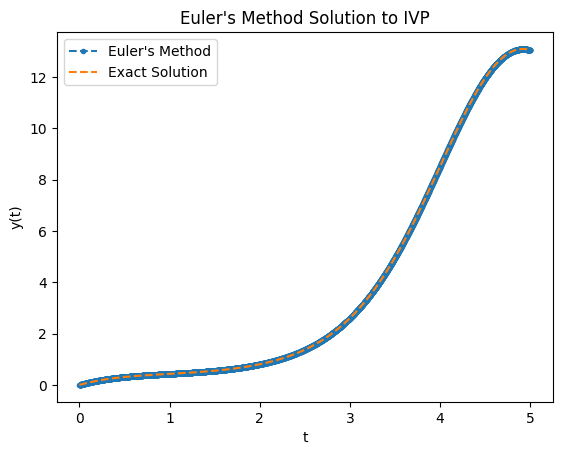

PyObject <matplotlib.legend.Legend object at 0x78ef2a2b8e60>

In [117]:

plot(t, y, label ="Euler's Method", marker=".", linestyle="dashed")
plot(t, yexact.(t), label="Exact Solution", linestyle="dashed")
# grid(true) aciddentally made it a boolean function
xlabel("t")
ylabel("y(t)")
title("Euler's Method Solution to IVP")
legend() # error is wehre the two lines are meeting 

In [109]:

np = 9
hh = zeros(np)
gerr = zeros(np)

for i = 1:np
    n = 2^(i+3)
    t, y = myeulers(fun, a, b, n, y1)
    hh[i] = t[2] - t[1]
    gerr[i] = abs(yexact(b) - y[end])
end

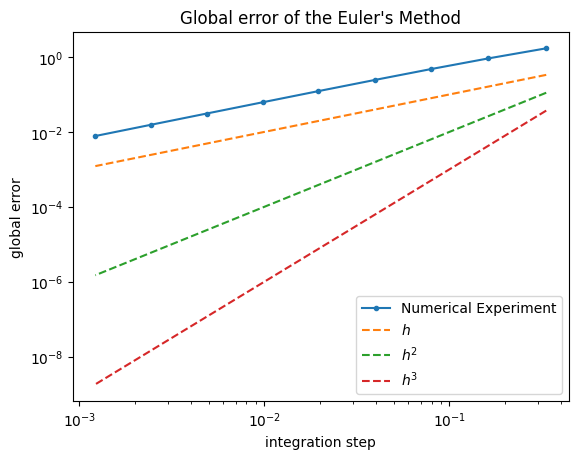

PyObject <matplotlib.legend.Legend object at 0x78ef2a115340>

In [111]:

loglog(hh, gerr, marker=".", label="Numerical Experiment")
loglog(hh, hh, linestyle="dashed", label=L"h")
loglog(hh, hh.^2, linestyle="dashed", label=L"h^2")
loglog(hh, hh.^3, linestyle="dashed", label=L"h^3")
#grid(true) accidentaly made it a boolean function 
title("Global error of the Euler's Method")
xlabel("integration step")
ylabel("global error")
legend()